<a href="https://colab.research.google.com/github/yuriborg/models/blob/main/Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [43]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Data Extraction

In [6]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

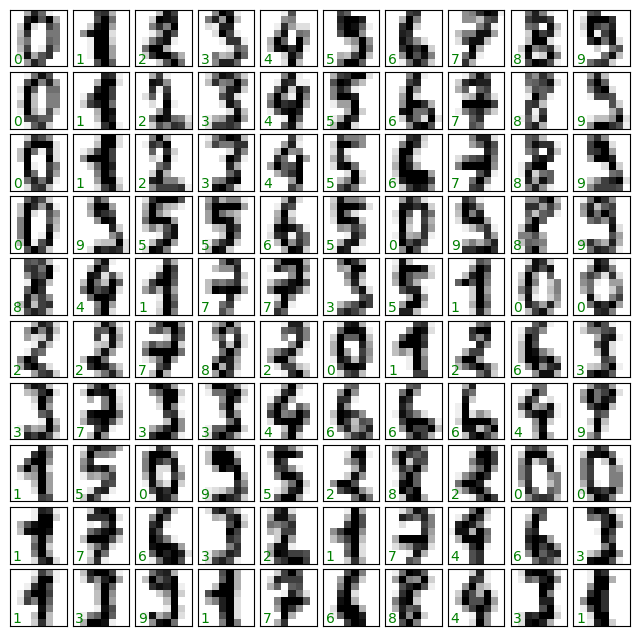

In [7]:
fig, axes = plt.subplots(10, 10, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i , ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),
          transform=ax.transAxes, color='green')

# Data Visualization

  - To visualize a 64-parameter space, let's transform it into a 2D dimensional space, using a manifold learning model called Isomap, it is a unsupervisioned learning method that applies dimensionality reduction to data[link text]

In [13]:
digits.data.shape

(1797, 64)

In [11]:
iso = Isomap()
iso.fit(digits.data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Isomap()

In [12]:
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

## Visualizing the transformed data

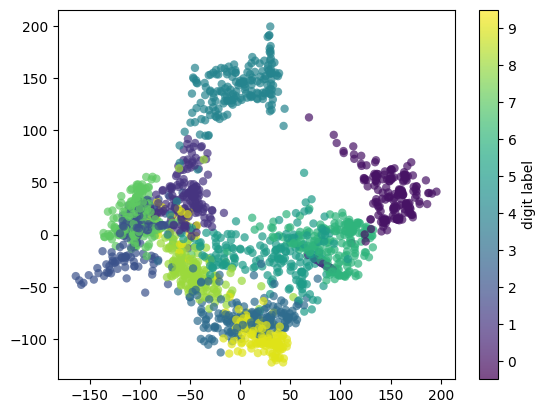

In [25]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.7)
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

# Classification

  - Apply Classification methods on the Digits Data

## Arrange features matrix and target vector

In [33]:
X = digits.data
X.shape

(1797, 64)

In [34]:
y = digits.target
y.shape

(1797,)

## Split into Train and Test datasets

In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1347, 64), (450, 64), (1347,), (450,))

## Choose the model, train and predict

In [39]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

## Evaluate Results

In [41]:
accuracy_score(ytest, y_model)

0.8333333333333334

Text(113.9222222222222, 0.5, 'True Value')

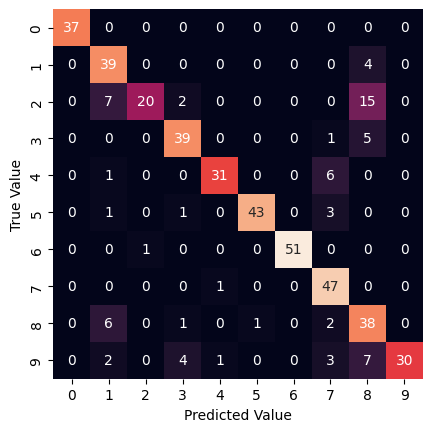

In [45]:
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

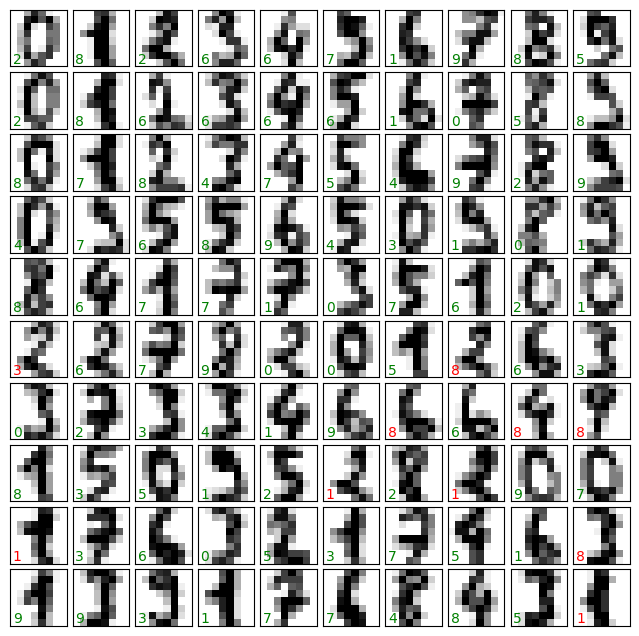

In [46]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes,
          color='green' if (ytest[i] == y_model[i]) else 'red')

# Conclusion

  - To go beyond the 80% classification rate, we
might move to a more sophisticated classification estimadtor, such as Support Vector Machines, Random Forests  or even boosting models.